In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
csv = 'Resources/data/data_cleaned_2021.csv'

In [3]:
df = pd.read_csv(csv).drop('index', axis=1)

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,...,0,0,1,1,0,0,0,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,...,0,0,0,0,0,0,0,data scientist,na,M
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,M
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,...,0,0,0,0,0,0,0,data scientist,na,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,na


### **MongoDB Setup**

In [5]:
#conn = 'mongodb://localhost:27017'
#client = pymongo.MongoClient(conn)

In [6]:
# Declare the database
#db = client.salary_db

# Declare the collections
#salary_col = db.salary_col


In [7]:
#salary_df.reset_index(inplace=True)
#salary_data_dict = salary_df.to_dict("records")

In [8]:
#salary_col.insert_many(salary_data_dict)

### **Data Preprocessing**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           742 non-null    object 
 1   Salary Estimate     742 non-null    object 
 2   Job Description     742 non-null    object 
 3   Rating              742 non-null    float64
 4   Company Name        742 non-null    object 
 5   Location            742 non-null    object 
 6   Headquarters        742 non-null    object 
 7   Size                742 non-null    object 
 8   Founded             742 non-null    int64  
 9   Type of ownership   742 non-null    object 
 10  Industry            742 non-null    object 
 11  Sector              742 non-null    object 
 12  Revenue             742 non-null    object 
 13  Competitors         742 non-null    object 
 14  Hourly              742 non-null    int64  
 15  Employer provided   742 non-null    int64  
 16  Lower Sa

In [10]:
df.isnull().sum()

Job Title             0
Salary Estimate       0
Job Description       0
Rating                0
Company Name          0
Location              0
Headquarters          0
Size                  0
Founded               0
Type of ownership     0
Industry              0
Sector                0
Revenue               0
Competitors           0
Hourly                0
Employer provided     0
Lower Salary          0
Upper Salary          0
Avg Salary(K)         0
company_txt           0
Job Location          0
Age                   0
Python                0
spark                 0
aws                   0
excel                 0
sql                   0
sas                   0
keras                 0
pytorch               0
scikit                0
tensor                0
hadoop                0
tableau               0
bi                    0
flink                 0
mongo                 0
google_an             0
job_title_sim         0
seniority_by_title    0
Degree                0
dtype: int64

In [11]:
df.nunique()

Job Title             264
Salary Estimate       416
Job Description       463
Rating                 31
Company Name          343
Location              200
Headquarters          198
Size                    8
Founded               102
Type of ownership       9
Industry               60
Sector                 25
Revenue                13
Competitors           128
Hourly                  2
Employer provided       2
Lower Salary          113
Upper Salary          162
Avg Salary(K)         219
company_txt           343
Job Location           37
Age                   102
Python                  2
spark                   2
aws                     2
excel                   2
sql                     2
sas                     2
keras                   2
pytorch                 2
scikit                  2
tensor                  2
hadoop                  2
tableau                 2
bi                      2
flink                   2
mongo                   2
google_an               2
job_title_si

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           742 non-null    object 
 1   Salary Estimate     742 non-null    object 
 2   Job Description     742 non-null    object 
 3   Rating              742 non-null    float64
 4   Company Name        742 non-null    object 
 5   Location            742 non-null    object 
 6   Headquarters        742 non-null    object 
 7   Size                742 non-null    object 
 8   Founded             742 non-null    int64  
 9   Type of ownership   742 non-null    object 
 10  Industry            742 non-null    object 
 11  Sector              742 non-null    object 
 12  Revenue             742 non-null    object 
 13  Competitors         742 non-null    object 
 14  Hourly              742 non-null    int64  
 15  Employer provided   742 non-null    int64  
 16  Lower Sa

In [13]:
df.describe()

,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.754717,128.214286,101.484501,47.524259,0.528302,0.225067,...,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,0.801210,497.183763,0.177034,0.149721,30.945892,45.128650,37.482449,53.839080,0.499535,0.417908,...,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,12.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,25.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,60.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
def outlier_hist_plot(df, yvar, ylabel, title):
    plt.figure(figsize=(10,8))
    plt.ylabel(ylabel,size=13)
    plt.hist(np.array(df[yvar]))
    plt.title(title,size=15, color='black')
    plt.show()

In [15]:
def outlier_box_plot(df,yvar, title):
    sns.boxplot(df[yvar])
    plt.title(title, size=15, color='black')
    plt.show()

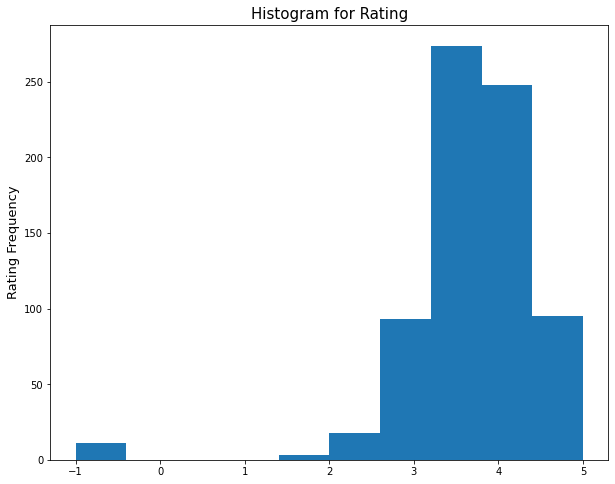

C:\Users\cdste\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


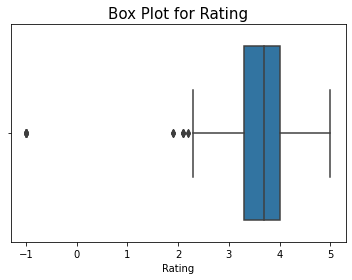

In [16]:
#Check for the outlier for Rating 

outlier_hist_plot(df,'Rating','Rating Frequency',"Histogram for Rating")  
outlier_box_plot(df,'Rating', 'Box Plot for Rating')

In [17]:
avg = df.loc[df['Rating'] != -1, 'Rating'].mean()
df['Rating']= np.where(df['Rating'] == -1, avg, df['Rating'])

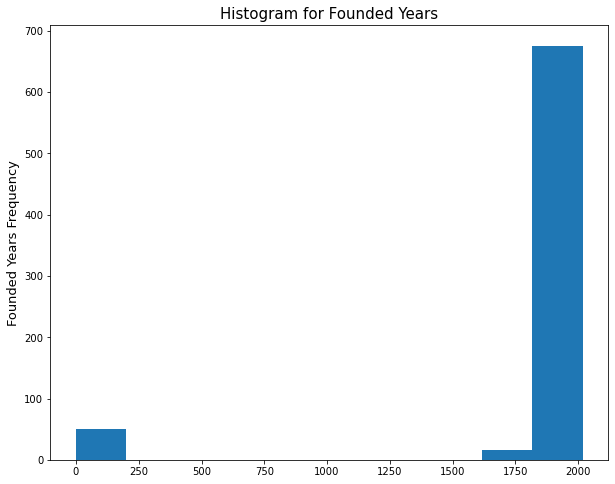

C:\Users\cdste\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


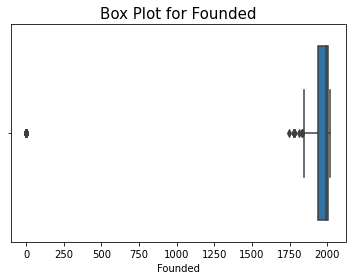

In [18]:
#Check the outlier for Founded Year

outlier_hist_plot(df,'Founded','Founded Years Frequency',"Histogram for Founded Years")  
outlier_box_plot(df,'Founded', 'Box Plot for Founded')

In [19]:
avg = np.ceil(df.loc[df['Founded'] != -1, 'Founded'].mean())
df['Founded']=np.where(df['Founded'] == -1 , avg, df['Founded'])

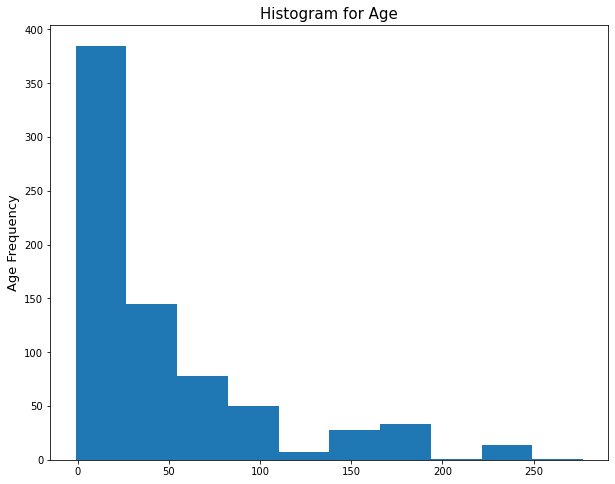

C:\Users\cdste\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


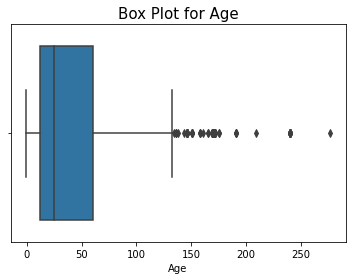

In [20]:
outlier_hist_plot(df,'Age','Age Frequency',"Histogram for Age")  
outlier_box_plot(df,'Age', 'Box Plot for Age')

In [21]:
#Find the location with jobs

df['Job Location'].unique()

array(['NM', 'MD', 'FL', 'WA', 'NY', 'TX', 'CA', 'VA', 'MA', 'NJ', 'CO',
       'IL', 'KY', 'OR', 'CT', 'MI', 'DC', 'OH', 'AL', 'MO', 'PA', 'GA',
       'IN', 'LA', 'WI', 'NC', 'AZ', 'NE', 'MN', 'UT', 'TN', 'DE', 'ID',
       'RI', 'IA', 'SC', 'KS'], dtype=object)

In [22]:
#function to calculate the summary

def group_plot(df,var1,var2):
    df1=df.groupby(var1)[var2].count()
    df1=df1.reset_index()
    df1.rename(columns={var2:'Total Count'}, inplace=True)
    df1.sort_values(by=['Total Count'], ascending=False, inplace=True)
    df1.reset_index(drop=True, inplace=True)
    return df1

In [23]:
#Function to plot the histogram

def plot_hist(df,yvar, xvar, ylabel, xlabel, title):
    y_pos=np.arange(len(df[yvar]))
    plt.figure(figsize=(10,8))
    plt.bar(y_pos,df[xvar], align='center', alpha=0.5, color='green')
    plt.xticks(y_pos, df[yvar],rotation='vertical')
    plt.xlabel(xlabel, size=12)
    plt.ylabel(ylabel, size=12)
    plt.title(title, size=16, color='black')
    plt.show() 

In [24]:
#Function to plot the multiple histogram

def multiple_plot_hist(df,df_top, yvar,xlabel, title):
    df1=df[[yvar, 'Lower Salary', 'Upper Salary', 'Avg Salary(K)']]
    df1_summary=df1.groupby(yvar).agg({'Lower Salary':'mean','Upper Salary':'mean', 'Avg Salary(K)':'mean'})
    df1_summary.reset_index(drop=False, inplace=True)
    if(df_top.shape != df.shape):
        df1_summary=pd.merge(df1_summary, df_top[[yvar]], on=yvar, how="inner")

    
    width=0.25
    ind=np.arange(len(df1_summary[yvar]))
    plt.figure(figsize=(10,10))
    bar1 = plt.bar(ind, df1_summary['Lower Salary'], width, color = 'r')
    bar2 = plt.bar(ind+width, df1_summary['Upper Salary'], width, color='g')
    bar3 = plt.bar(ind+width*2, df1_summary['Avg Salary(K)'], width, color='b')
    
    plt.xlabel(xlabel, size=13)
    plt.ylabel('Salary($K)', size=13)
    plt.title(title, size=15, color='black')
    plt.xticks(ind+width, df1_summary[yvar],rotation='vertical')
    plt.legend( (bar1, bar2, bar3), ('Minimum Salary', 'Maximum Salary', 'Average Salary') )
    plt.show()

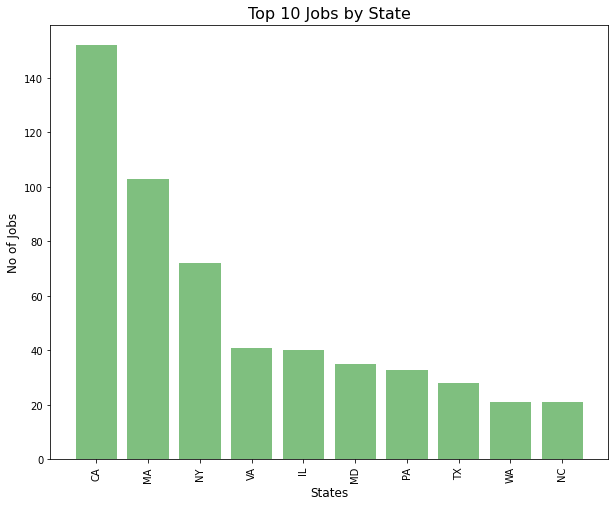

In [25]:
#Group the States by Number of Jobs
states_jobs=group_plot(df,'Job Location','Job Title')

#Plot the top 10 jobs
states_job_top= states_jobs[0:10]

#Plot the histogram for the top 10 states with maximum number of jobs
plot_hist(states_job_top,'Job Location','Total Count','No of Jobs','States','Top 10 Jobs by State')

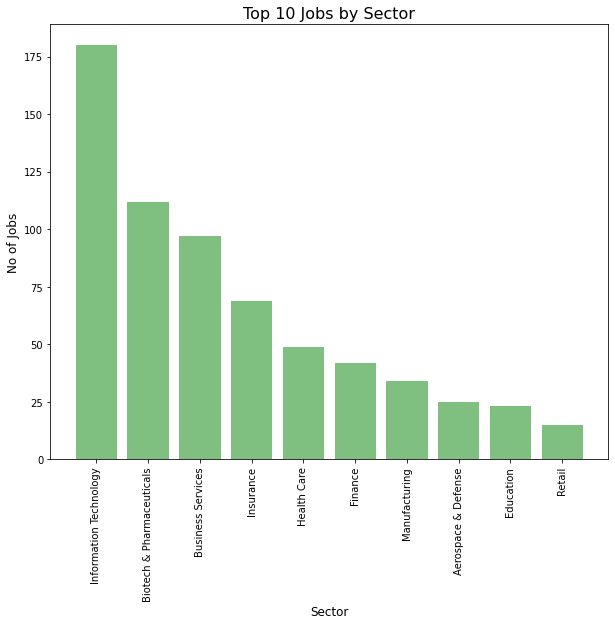

In [26]:
df['Sector'].nunique()
sector_job=group_plot(df,'Sector','Job Title') 
sector_job_top=sector_job[0:10]

#Plot the histogram for the top 10 Sectors with maximum number of jobs
plot_hist(sector_job_top,'Sector','Total Count','No of Jobs','Sector','Top 10 Jobs by Sector')

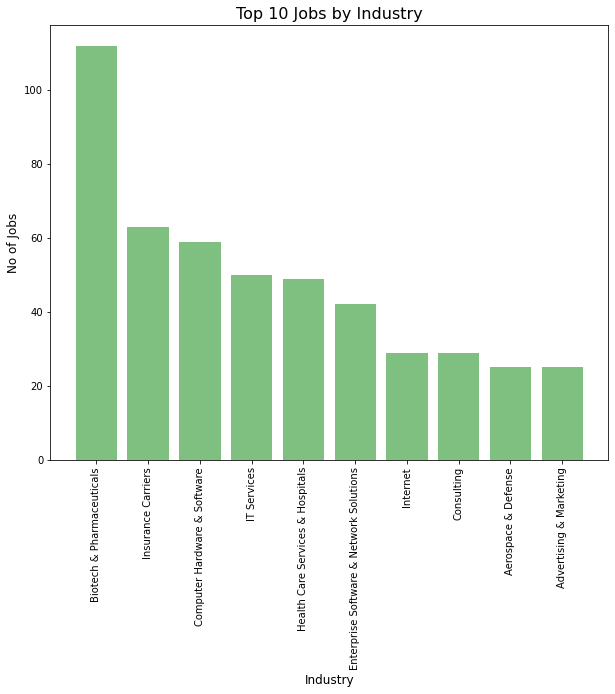

In [27]:
df['Industry'].nunique()

industry_job=group_plot(df,'Industry','Job Title') 
industry_job_top=industry_job[0:10]

#Plot the histogram for the top 10 Industry with maximum number of jobs posted
plot_hist(industry_job_top,'Industry','Total Count','No of Jobs','Industry','Top 10 Jobs by Industry')

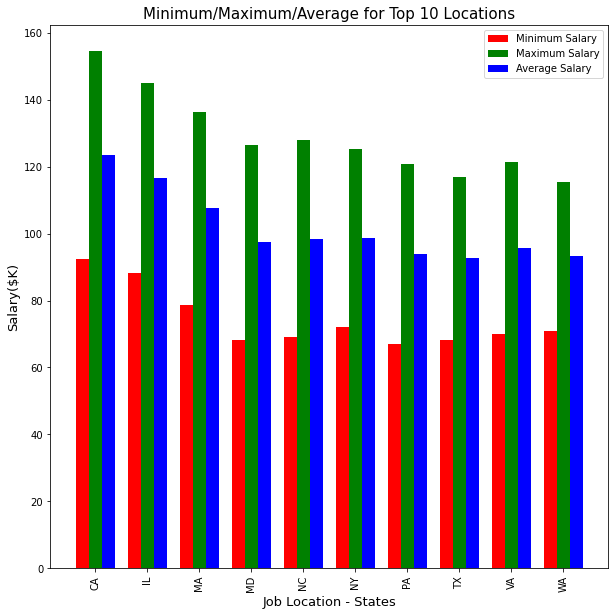

In [28]:
#Salary Split in Top 10 location - Maximum,Mininum and Average

multiple_plot_hist(df,states_job_top,'Job Location',"Job Location - States", "Minimum/Maximum/Average for Top 10 Locations")

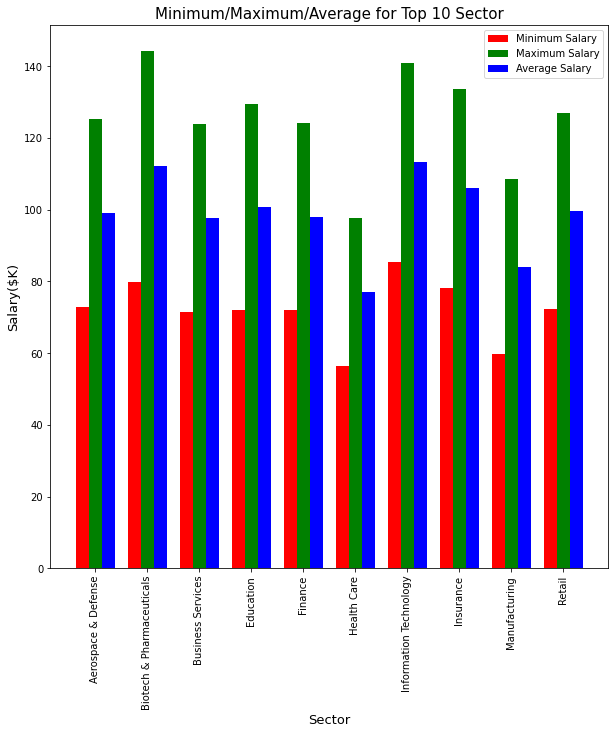

In [29]:
#Salary split across top sectors - Maximum, Minimum and Average

multiple_plot_hist(df,sector_job_top,'Sector',"Sector", "Minimum/Maximum/Average for Top 10 Sector")
#

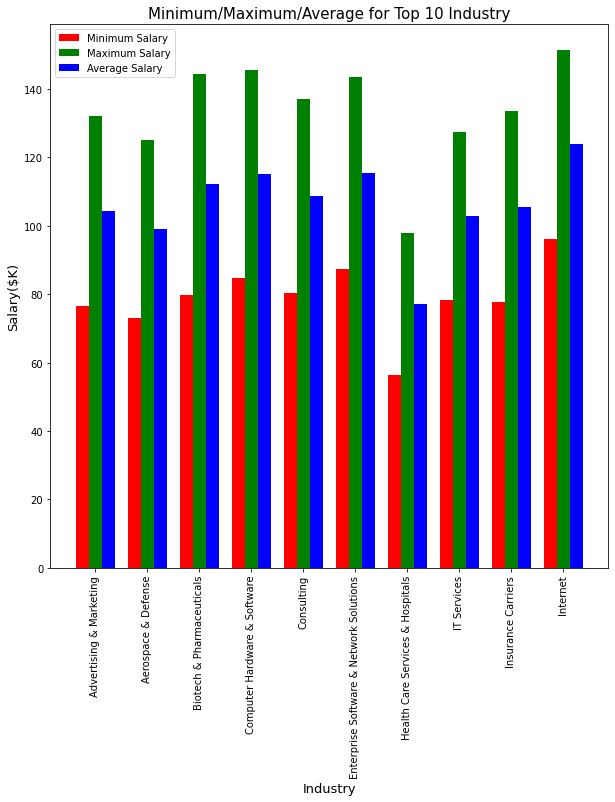

In [30]:
#Industry Split across top industries - Maximum,Minimum and Average

multiple_plot_hist(df,industry_job_top,'Industry',"Industry", "Minimum/Maximum/Average for Top 10 Industry")

In [31]:
df['Type of ownership'].unique()
df.groupby(['Type of ownership'])['Job Title'].count()

Type of ownership
College / University               13
Company - Private                 410
Company - Public                  193
Government                         15
Hospital                           15
Nonprofit Organization             55
Other Organization                  5
School / School District            2
Subsidiary or Business Segment     34
Name: Job Title, dtype: int64

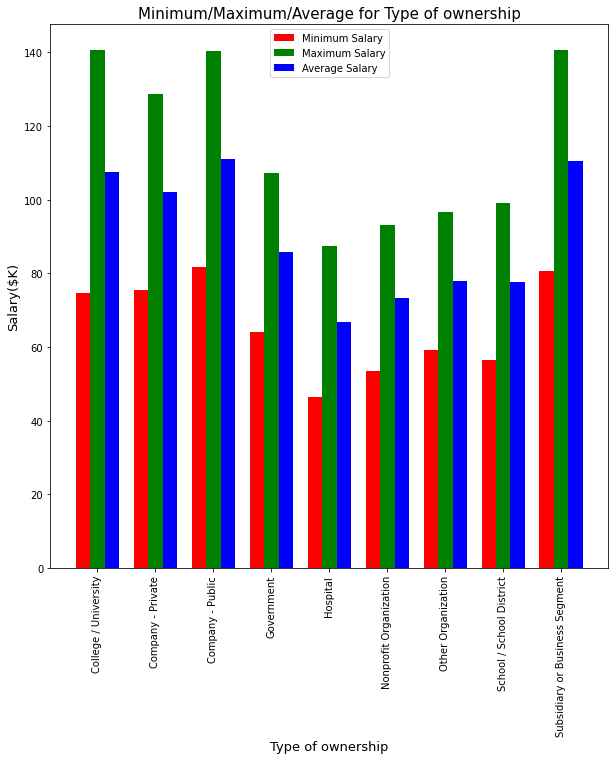

In [32]:
# Determine if salary is varies based on the type of ownership

sal_own=df[['Type of ownership', 'Lower Salary', 'Upper Salary', 'Avg Salary(K)']]
sal_own_summary=sal_own.groupby('Type of ownership').agg({'Lower Salary':'mean','Upper Salary':'mean', 'Avg Salary(K)':'mean'})
sal_own_summary.reset_index(drop=False, inplace=True)
multiple_plot_hist(df,df,'Type of ownership',"Type of ownership", "Minimum/Maximum/Average for Type of ownership")

In [33]:
df['job_title_sim'].unique()
title_summary=df.groupby(['job_title_sim'])['Job Title'].count()
title_summary=title_summary.reset_index()
title_summary= title_summary.sort_values(['Job Title'], ascending=False)

title_summary_top=title_summary[0:5]
title_summary_top=title_summary_top.reset_index(drop=True)

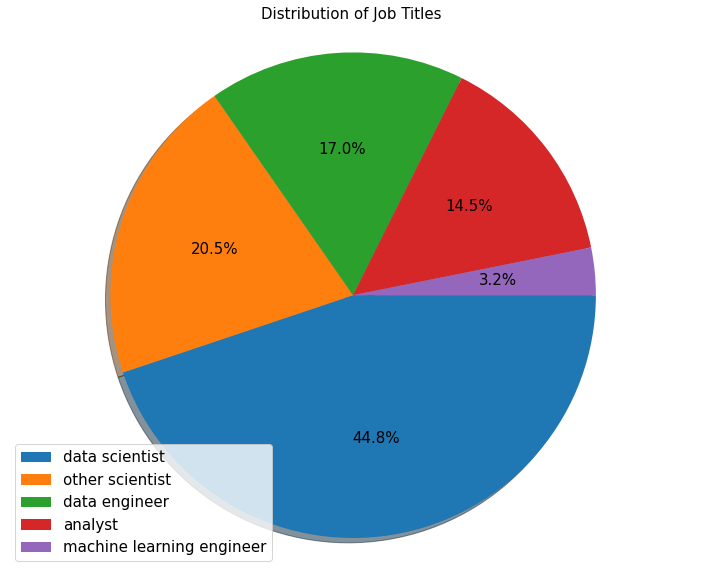

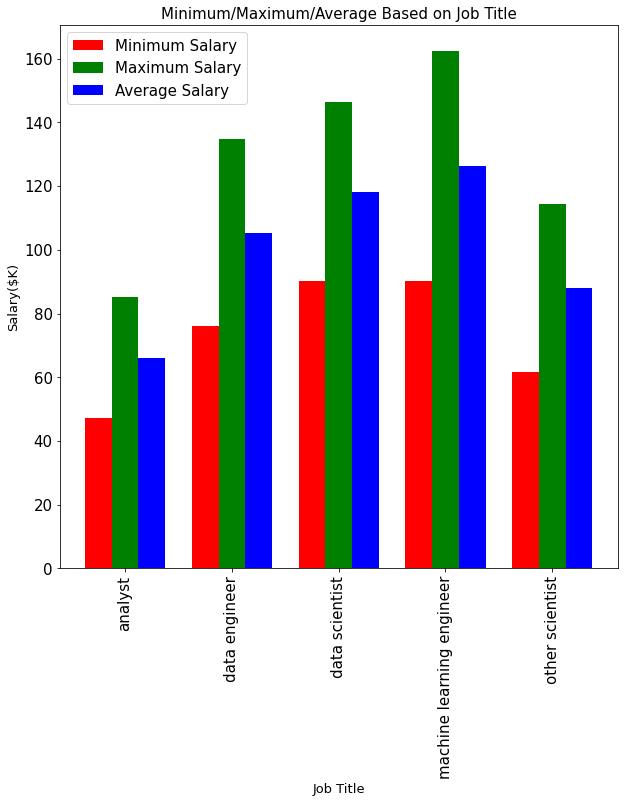

In [34]:
plt.figure(figsize=(10,8))
plt.rcParams['font.size'] = 15
plt.rc('legend',fontsize=15)
plt.pie(title_summary_top['Job Title'],autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.legend(title_summary_top['job_title_sim'], loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title("Distribution of Job Titles", size=15)
plt.show()
#Salary with respect to Job Title
multiple_plot_hist(df,title_summary_top,'job_title_sim',"Job Title", "Minimum/Maximum/Average Based on Job Title")

In [35]:
#Analyze skills required for different roles and positions

skill=df.groupby('job_title_sim').agg({'Python': 'sum','spark': 'sum', 'aws': 'sum', 'excel':'sum', 'sql': 'sum', 'sas':'sum', 'keras':'sum','pytorch':'sum', 'scikit':'sum', 'tensor':'sum', 'hadoop':'sum', 'tableau':'sum', 'bi':'sum', 'flink':'sum', 'mongo':'sum', 'google_an':'sum'})
skill=skill.reset_index(drop=False)

#get the skills for the top 5 jobs posted on Glassdoor
skill_top=pd.merge(skill,title_summary_top[['job_title_sim']], how="inner", on = "job_title_sim")
skill_top_t=skill_top.T
skill_top_t=skill_top_t[1:]
skill_top_t.columns=skill_top['job_title_sim'].tolist()
skill_top_t.reset_index(drop=False, inplace=True)
skill_top_t.rename(columns={'index': 'Skills'}, inplace=True)

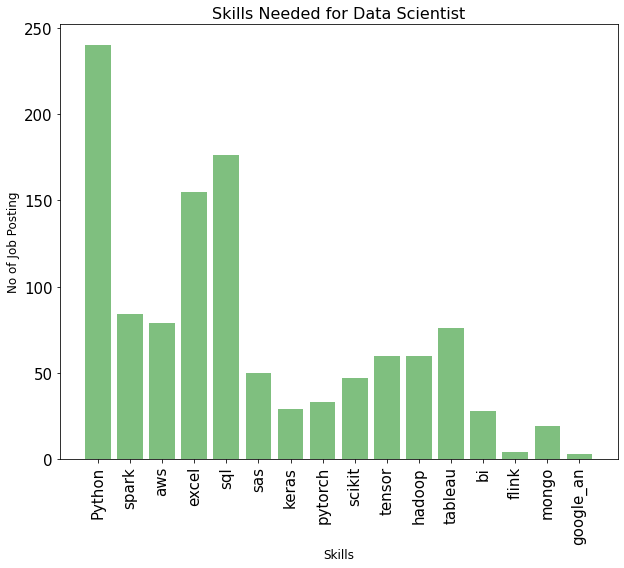

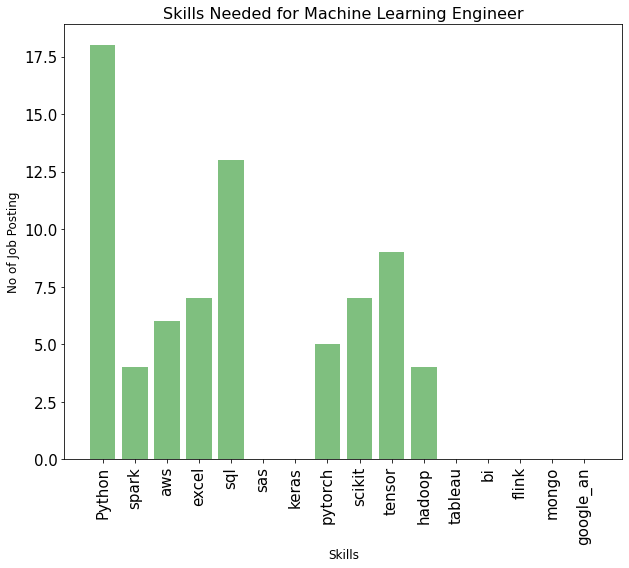

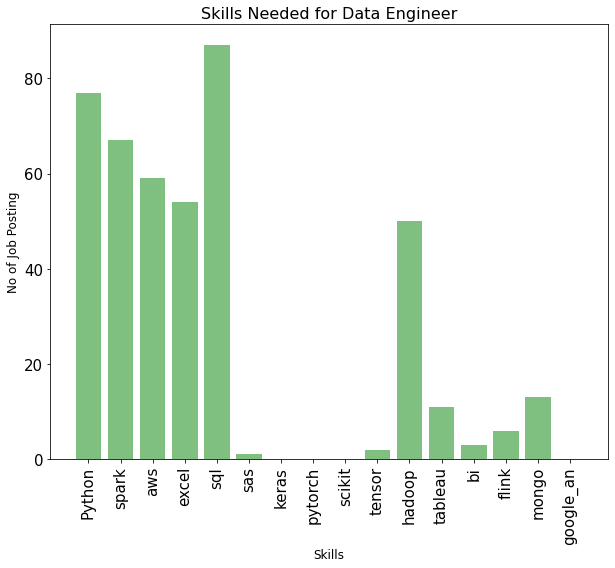

In [36]:
plot_hist(skill_top_t,'Skills', 'data scientist','No of Job Posting','Skills','Skills Needed for Data Scientist')
plot_hist(skill_top_t,'Skills', 'machine learning engineer','No of Job Posting','Skills','Skills Needed for Machine Learning Engineer')
plot_hist(skill_top_t,'Skills', 'data engineer','No of Job Posting','Skills','Skills Needed for Data Engineer')

In [37]:
#Size of the company vs salary

df['Revenue'].nunique()

13

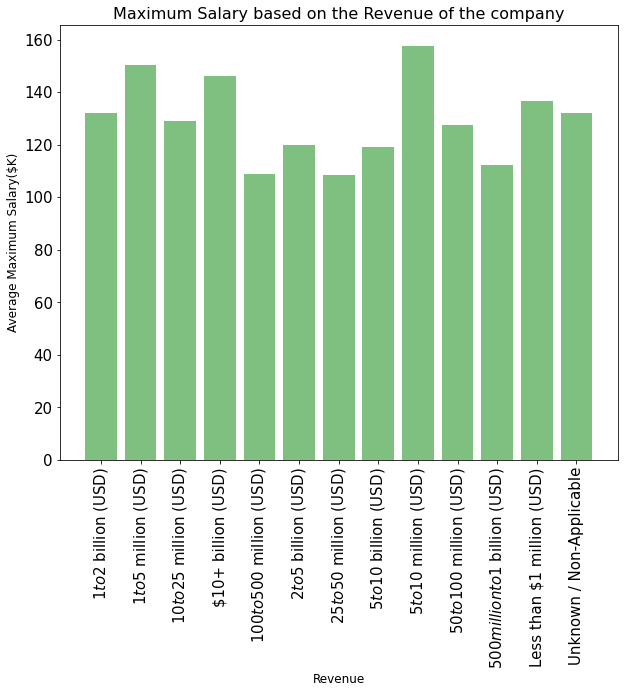

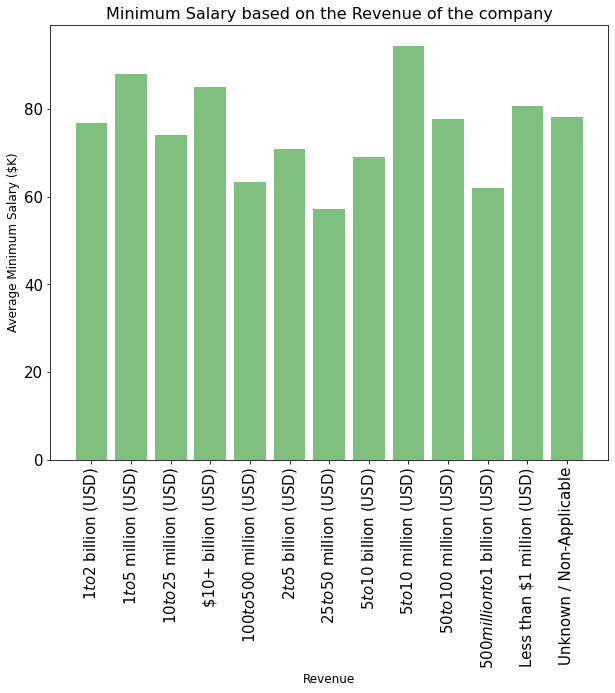

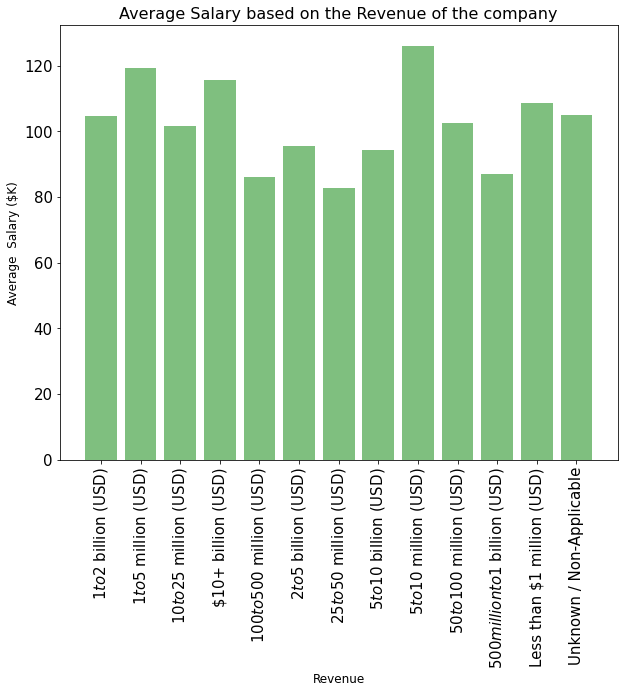

In [38]:
rev_company=df.groupby('Revenue').agg({'Lower Salary':'mean','Upper Salary':'mean', 'Avg Salary(K)':'mean'})
rev_company.reset_index(drop=False,inplace=True)

plot_hist(rev_company,'Revenue', 'Upper Salary','Average Maximum Salary($K)','Revenue','Maximum Salary based on the Revenue of the company')
plot_hist(rev_company,'Revenue', 'Lower Salary','Average Minimum Salary ($K)','Revenue','Minimum Salary based on the Revenue of the company')
plot_hist(rev_company,'Revenue', 'Avg Salary(K)','Average  Salary ($K)','Revenue','Average Salary based on the Revenue of the company')

In [39]:
df['Rating'].nunique()

31

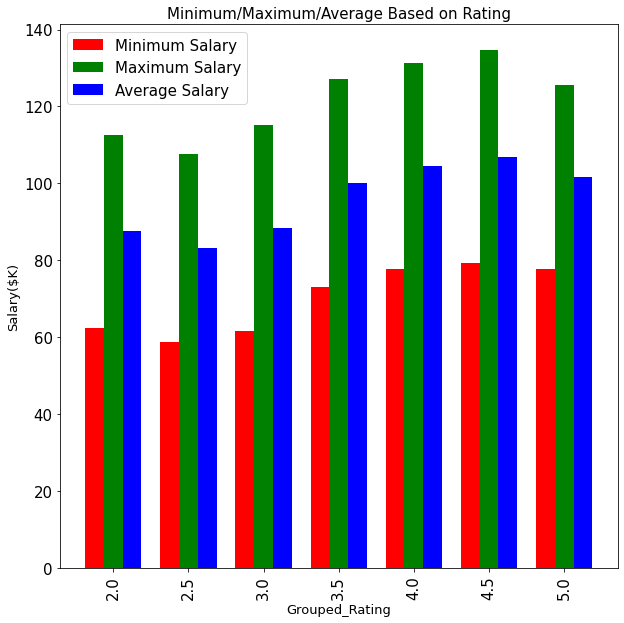

In [40]:
conditions=[df['Rating'] <= 2,
            df['Rating'] <= 2.5,
            df['Rating'] <= 3,
            df['Rating'] <= 3.5,
            df['Rating'] <= 4,
            df['Rating'] <= 4.5]
           
choices=[2,2.5,3,3.5,4,4.5] 
df.loc[:,'Grouped_Rating']= np.select(conditions,choices,default=5)

#Salary with respect to Rating 
multiple_plot_hist(df,df,'Grouped_Rating',"Grouped_Rating", "Minimum/Maximum/Average Based on Rating")

In [41]:
def location_desc(df,yvar,ylabel, xlabel, title):  
    plt.figure(figsize=(10,8))
    plt.hist(df[yvar])
    plt.xlabel(xlabel, size=14)
    plt.ylabel(ylabel, size=14)
    plt.title(title, size=16, color='black')
    plt.show() 

In [42]:
def plot_chart_state(df,i):
    location_desc(df[df['Job Location'] == i],'Upper Salary',  'Frequency', 'Maximum Salary ($)','Maximum Salary Distribution in ' + i )
    location_desc(df[df['Job Location'] == i],'Lower Salary',  'Frequency', 'Minimum Salary ($)','Minimum Salary Distribution in ' + i )
    location_desc(df[df['Job Location'] == i],'Avg Salary(K)',  'Frequency', 'Average Salary ($)','Average Salary Distribution in ' + i )
    
    
    
    
    #Plot the histogram for the top 10 Sectors with maximum number of jobs posted
    plot_hist(group_plot(df[df['Job Location'] == i],'Sector','Job Title')[0:10] ,'Sector','Total Count','No of Jobs','Sector','Top 10 Jobs by Sector in ' + i)
    
    
    #Plot the histogram for the top 10 Industry with maximum number of jobs posted
    plot_hist(group_plot(df[df['Job Location'] == i],'Industry','Job Title')[0:10] ,'Industry','Total Count','No of Jobs','Industry','Top 10 Jobs by Industry in ' + i)
    
    #Plot Type of Ownership 
    plot_hist(group_plot(df[df['Job Location'] == i],'Type of ownership','Job Title') ,'Type of ownership','Total Count','No of Jobs','Type of ownership','Type of Ownership in ' + i)
    
    #Plot the revenue base for these companies
    plot_hist(group_plot(df[df['Job Location'] == i],'Revenue','Job Title') ,'Revenue','Total Count','No of Jobs','Revenue','Revenue Distribution of companies hiring in ' + i)
    
    
    #Plot the Rating distribution for these companies
    plot_hist(group_plot(df[df['Job Location'] == i],'Grouped_Rating','Job Title') ,'Grouped_Rating','Total Count','No of Jobs','Rating','Rating Distribution of companies hiring  in ' + i)
    
    
    plot_hist(group_plot(df[df['Job Location'] == i],'job_title_sim','Job Title') ,'job_title_sim','Total Count','No of Jobs','Job Title ','Jobs Available in ' + i)

    #what is the age of the company in the state
    outlier_hist_plot(df[df['Job Location'] == i],'Age','Age Frequency',"Histogram for Company Age - "+ i)  

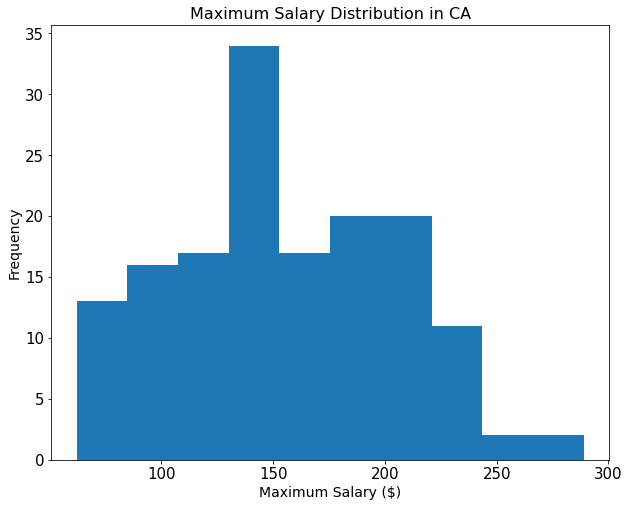

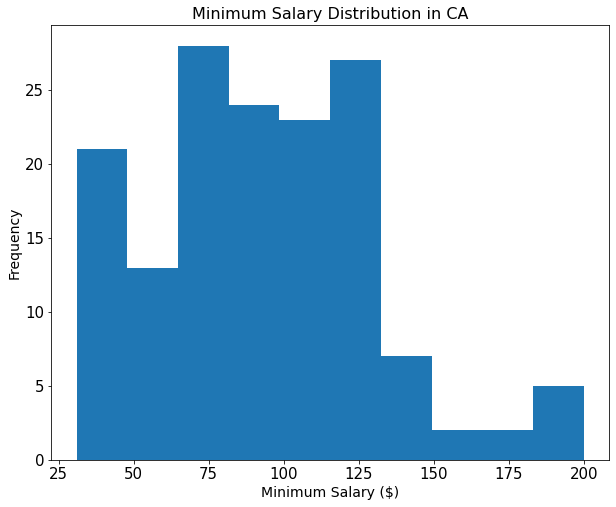

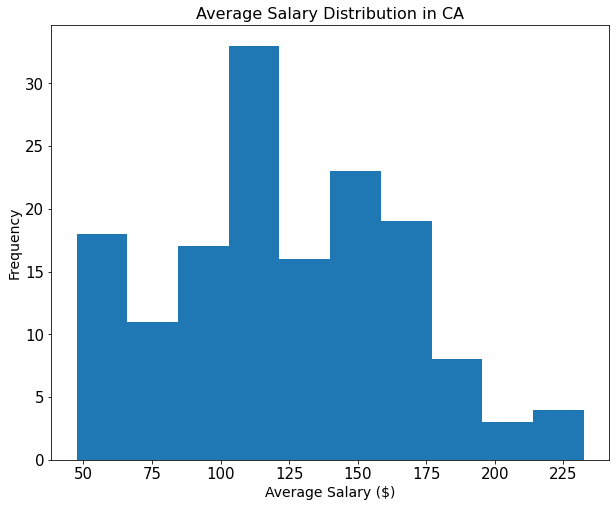

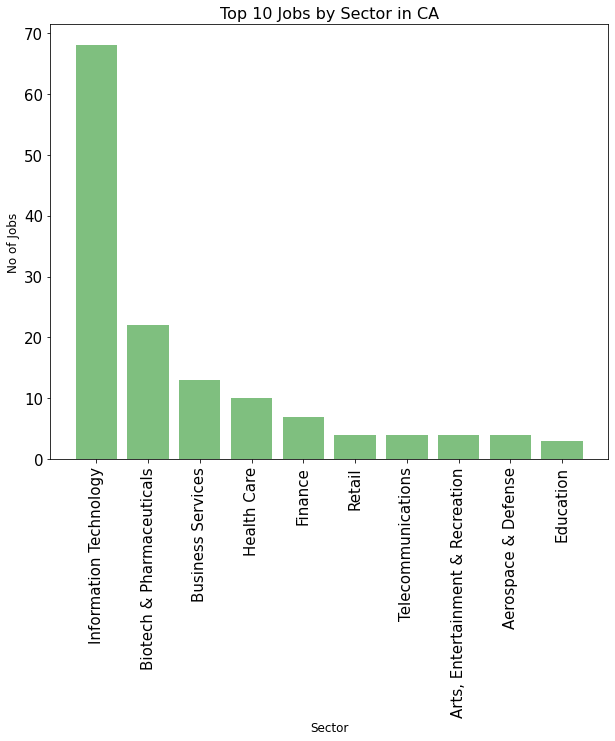

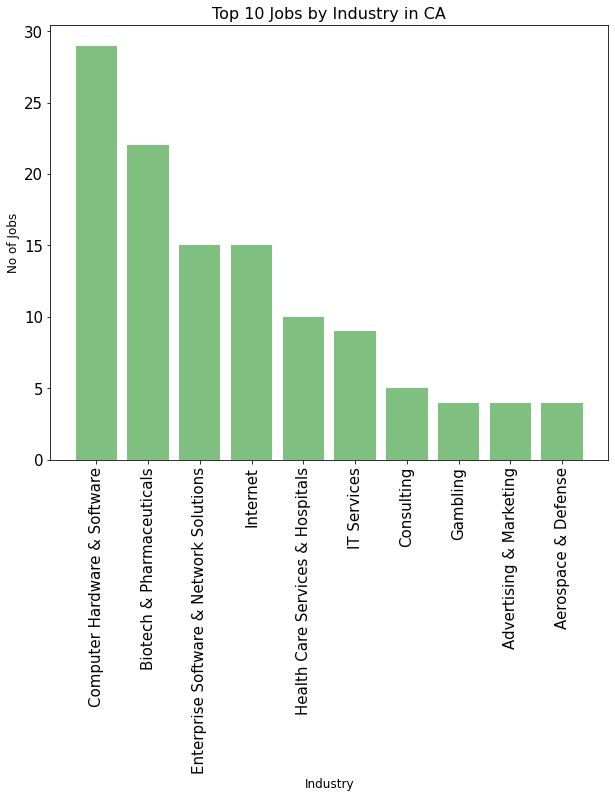

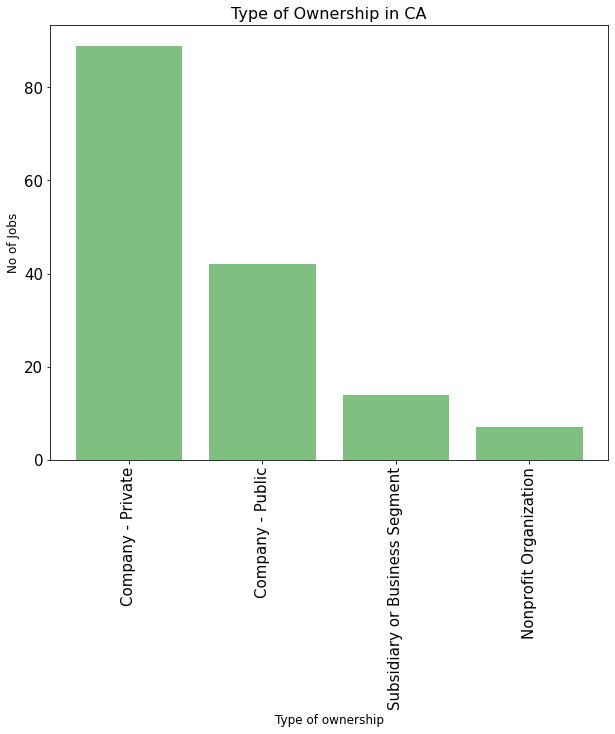

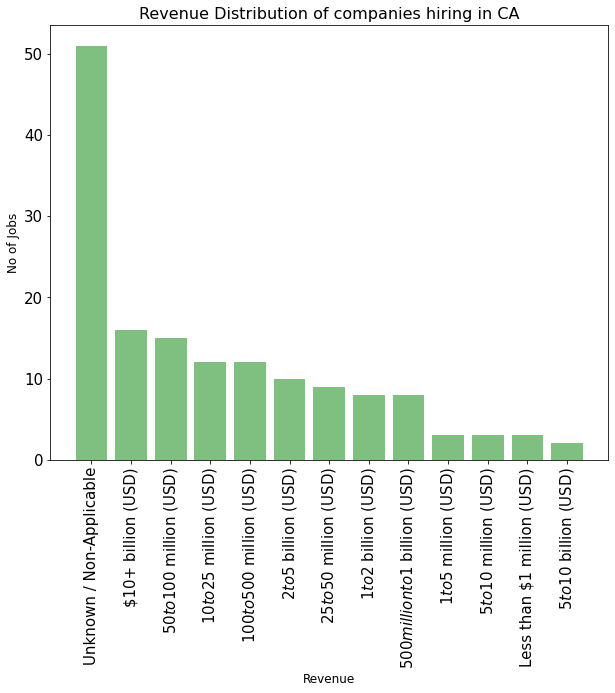

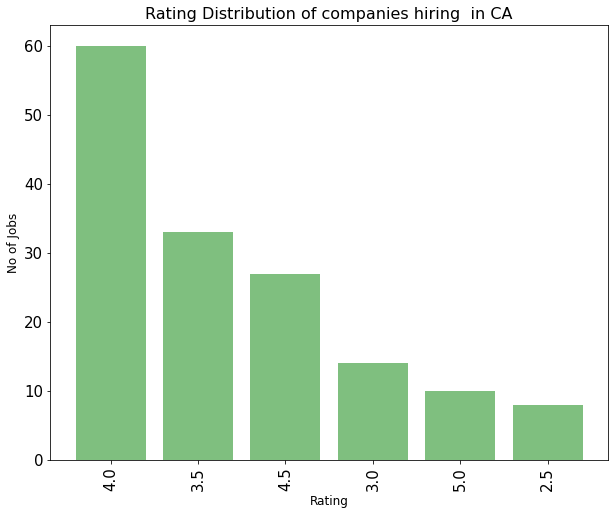

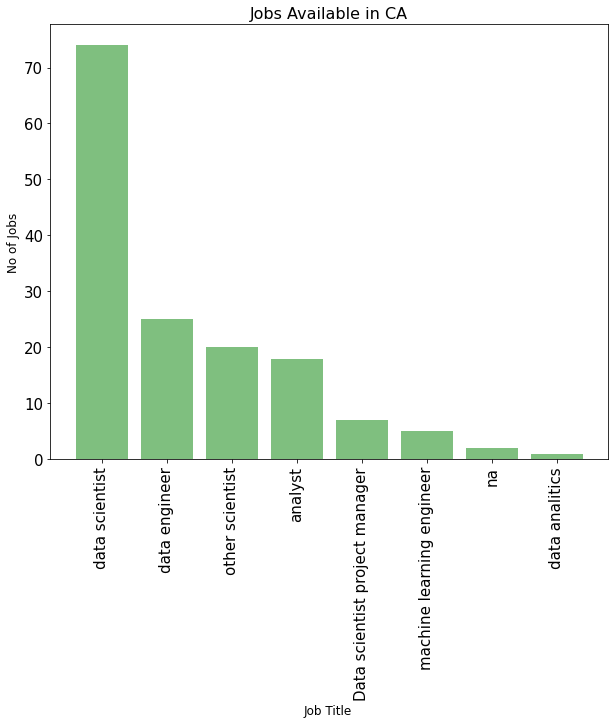

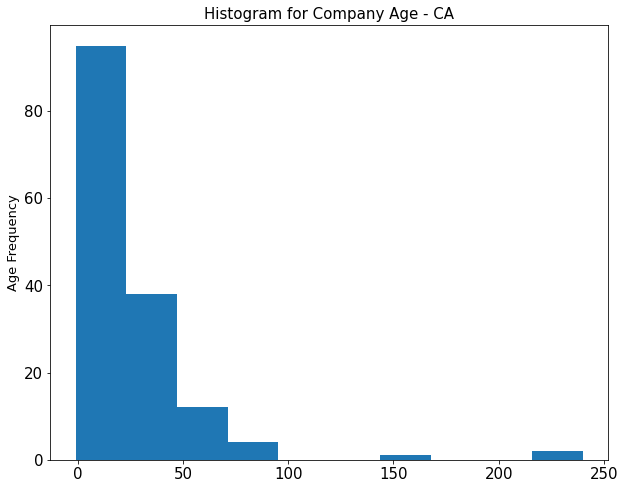

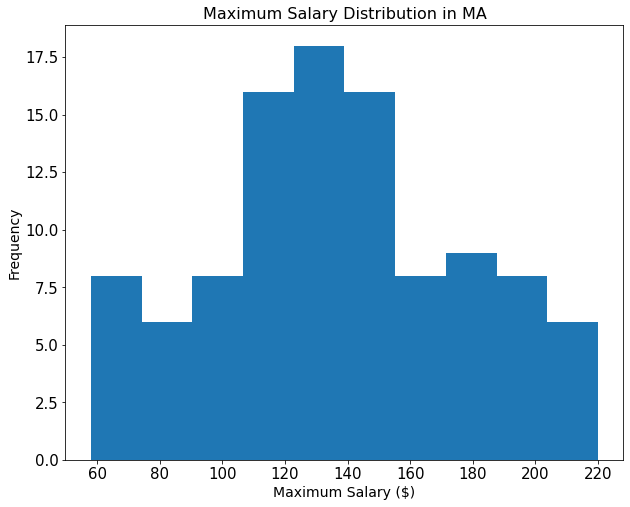

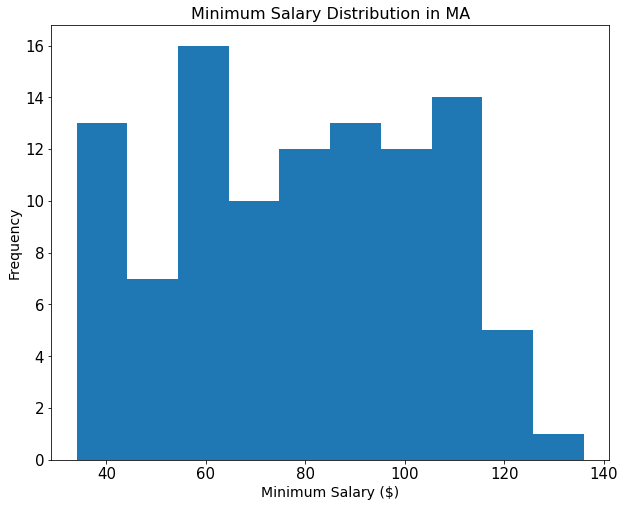

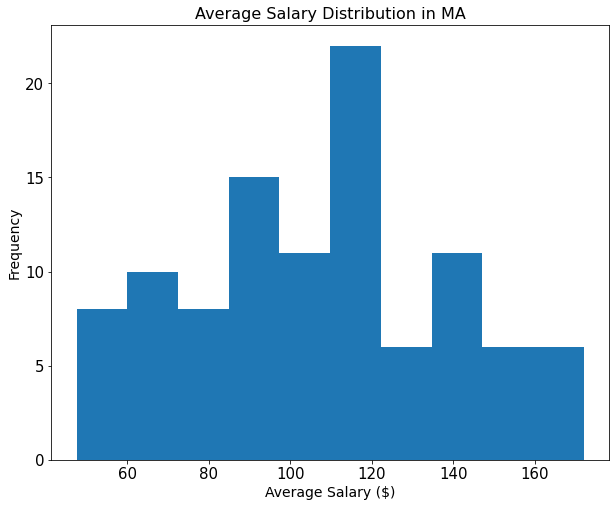

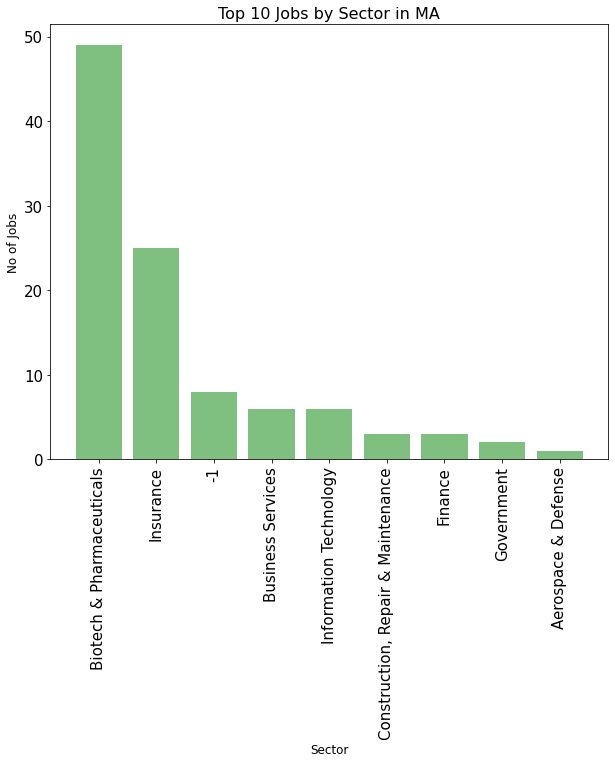

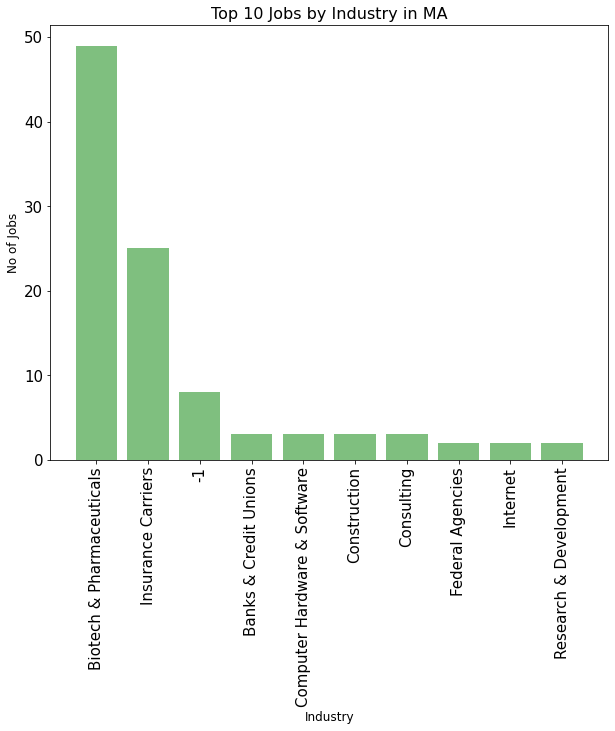

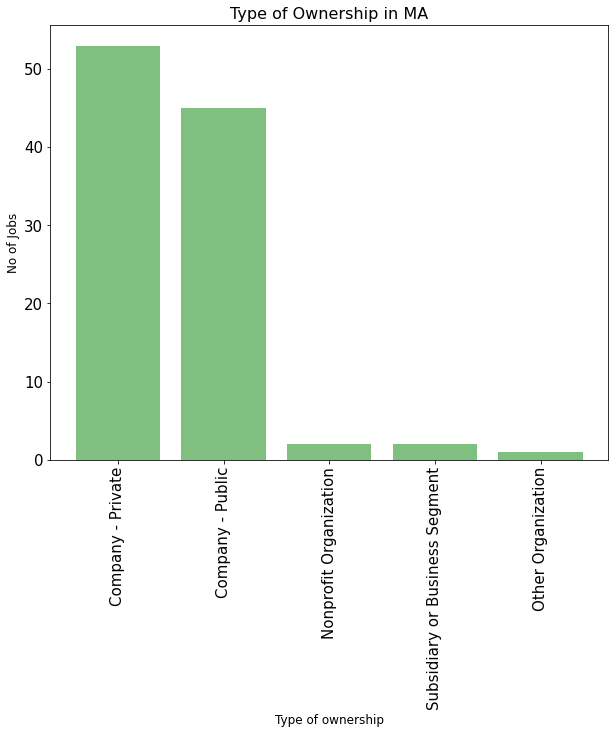

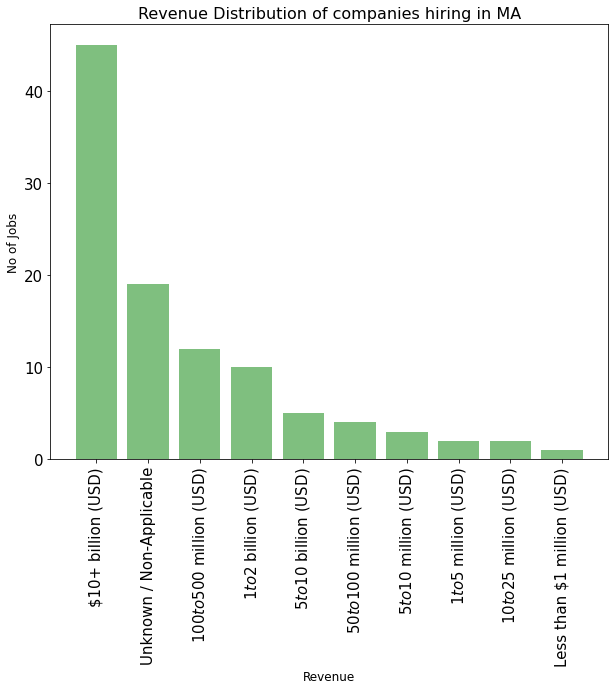

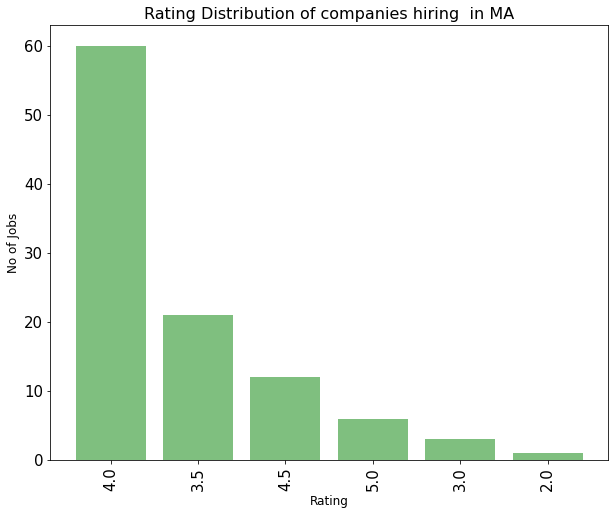

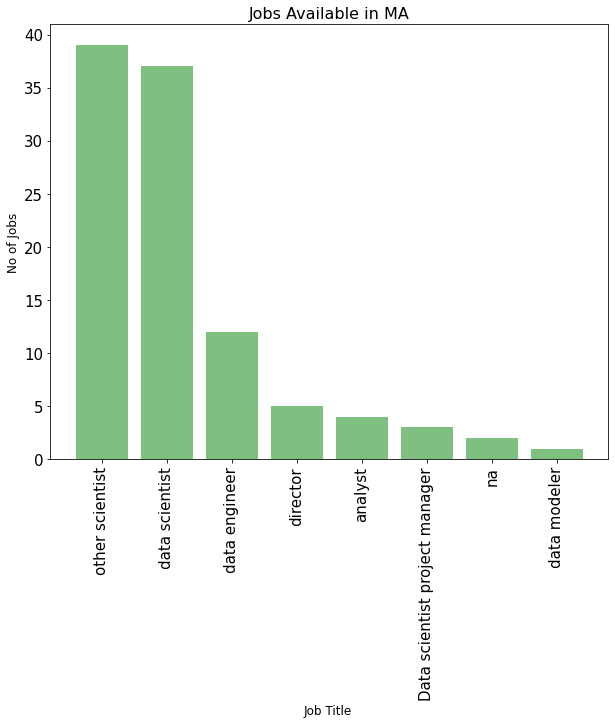

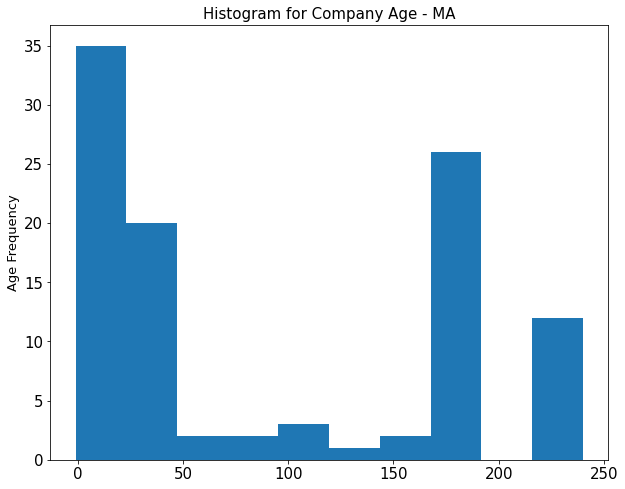

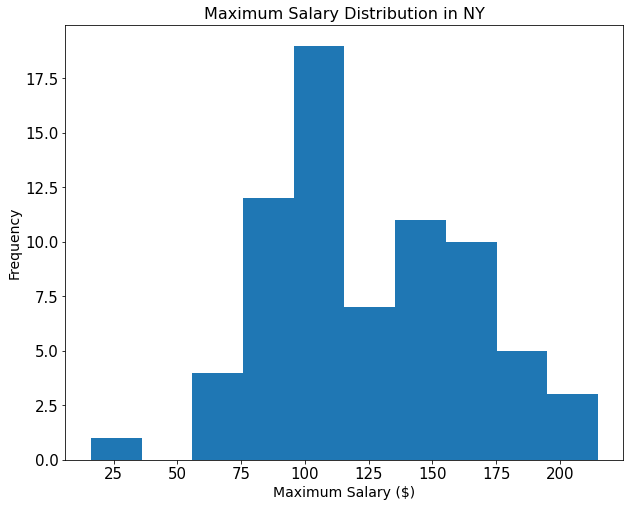

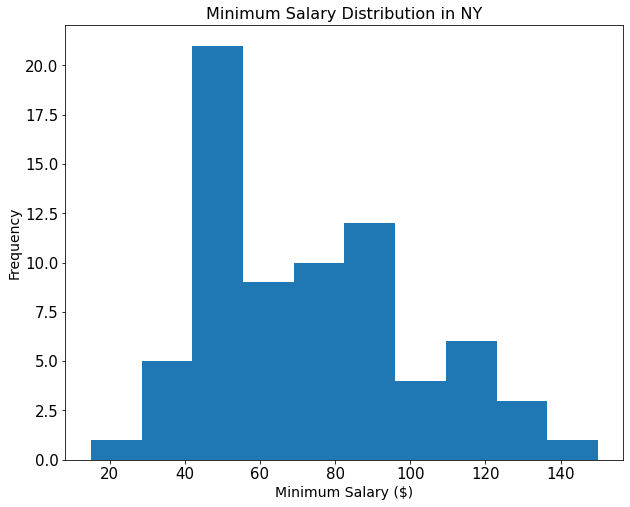

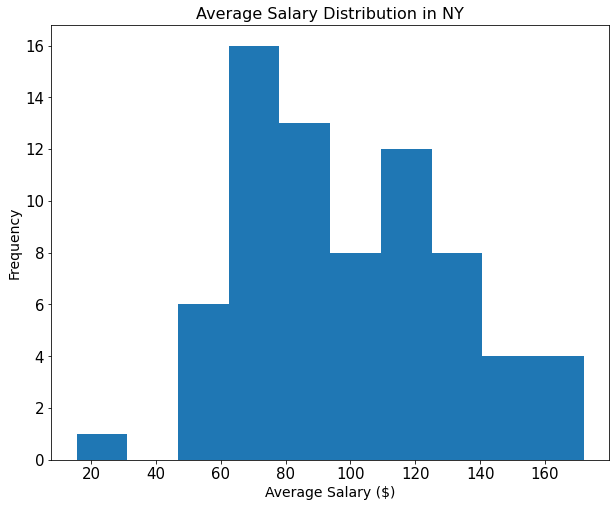

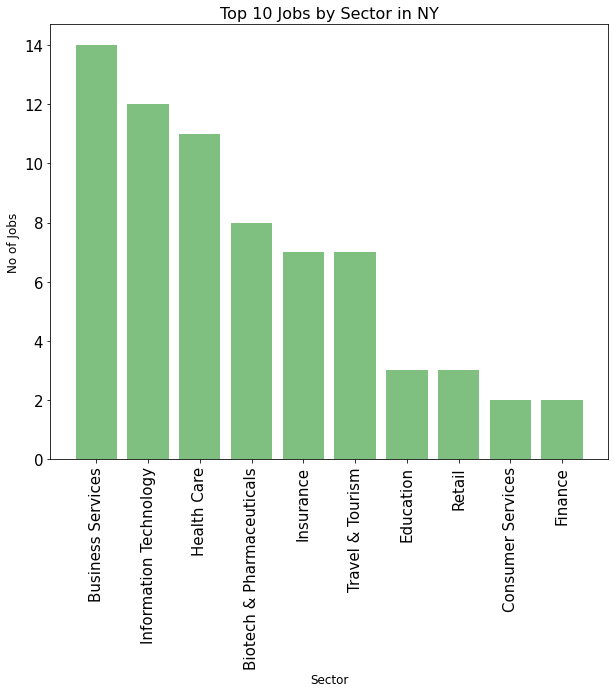

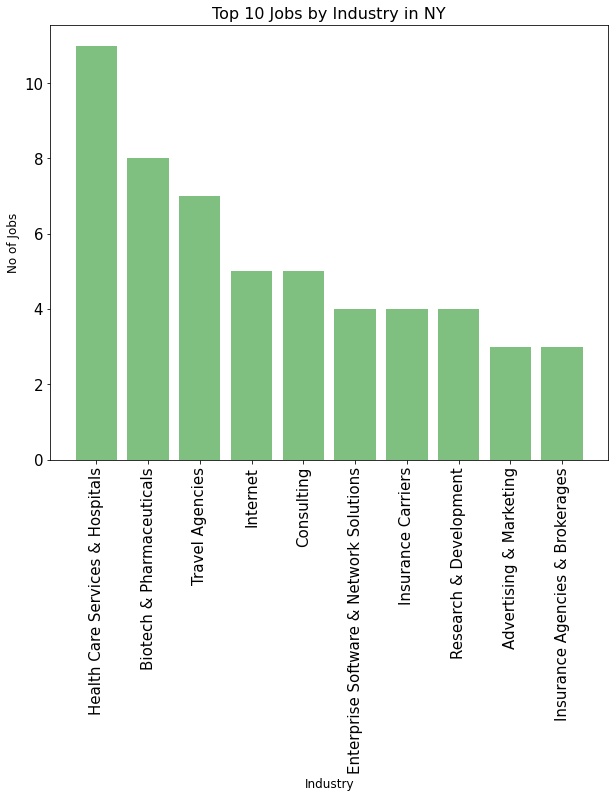

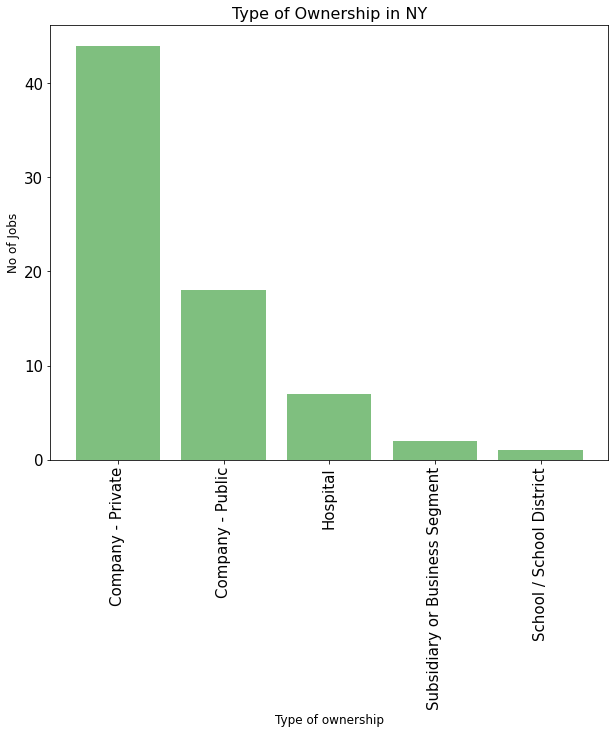

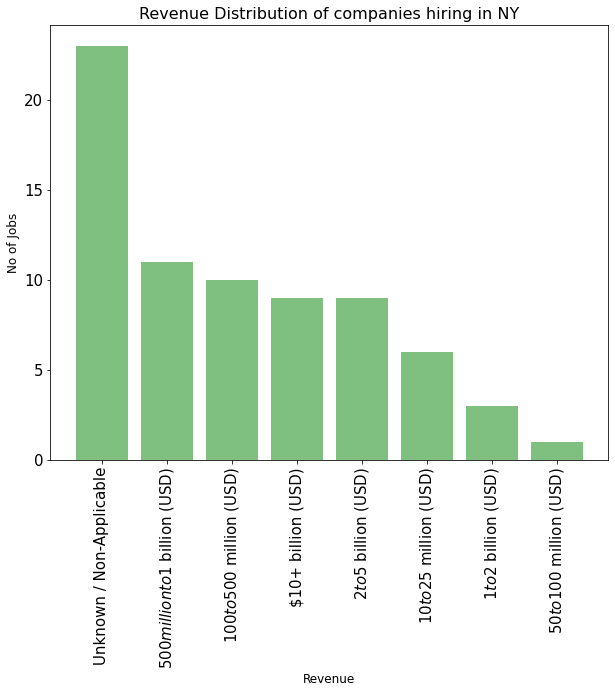

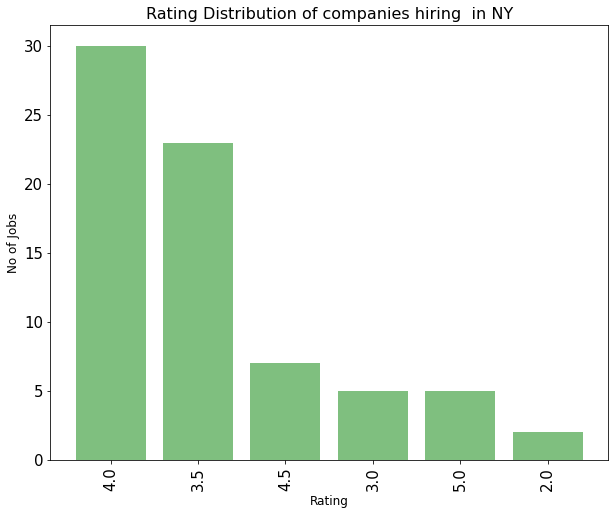

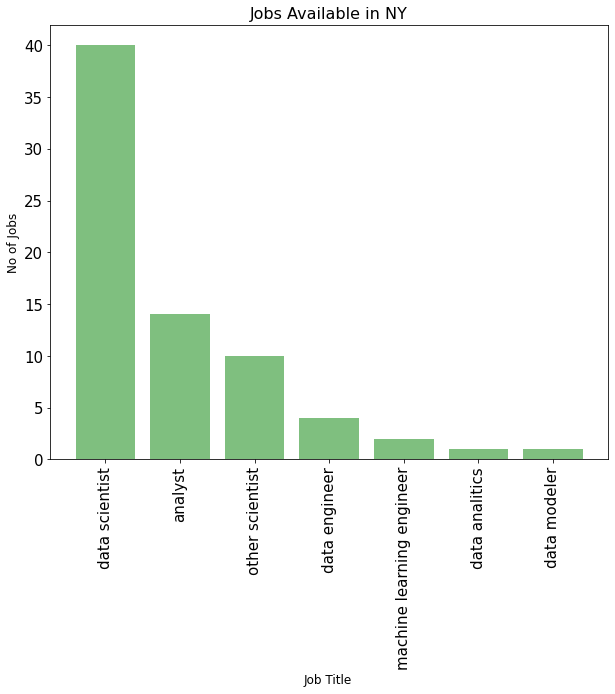

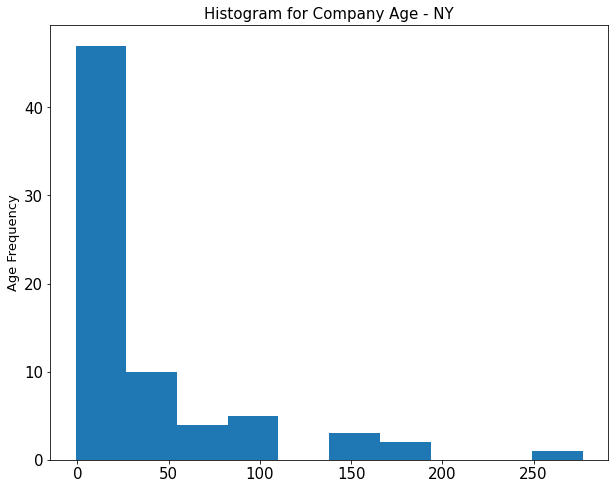

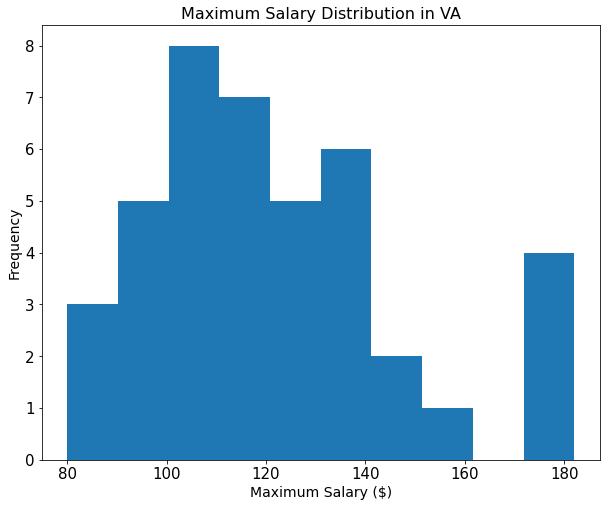

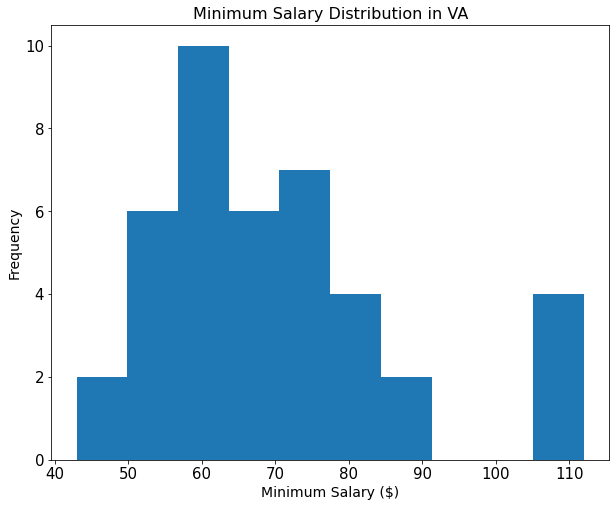

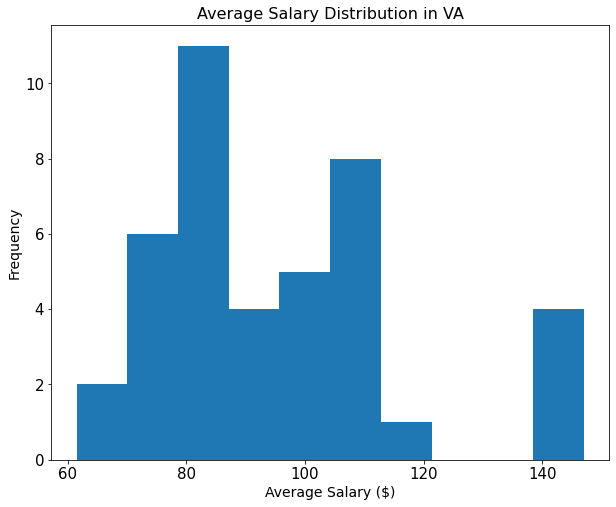

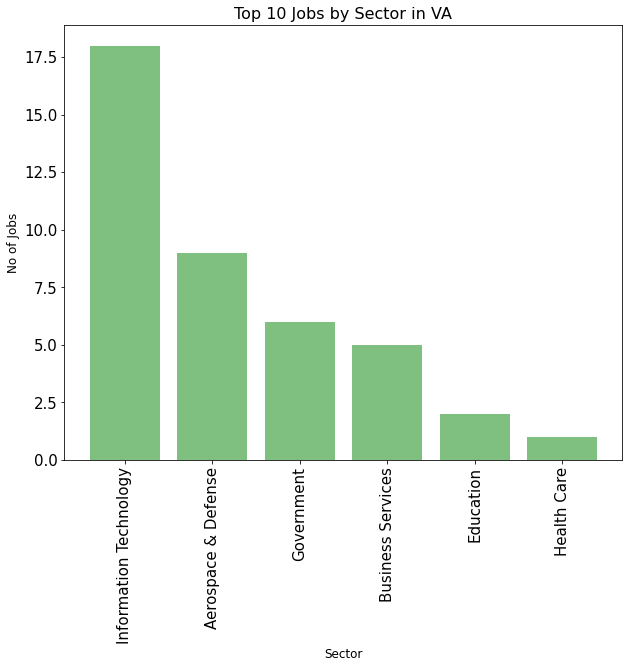

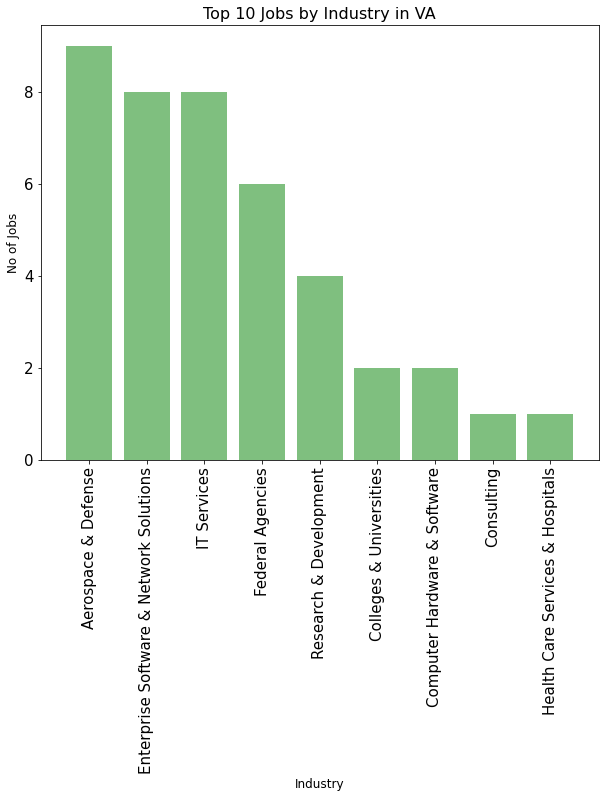

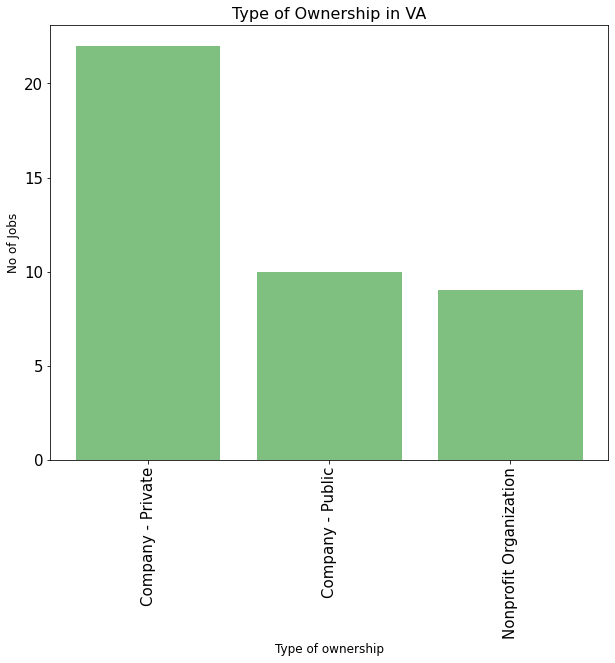

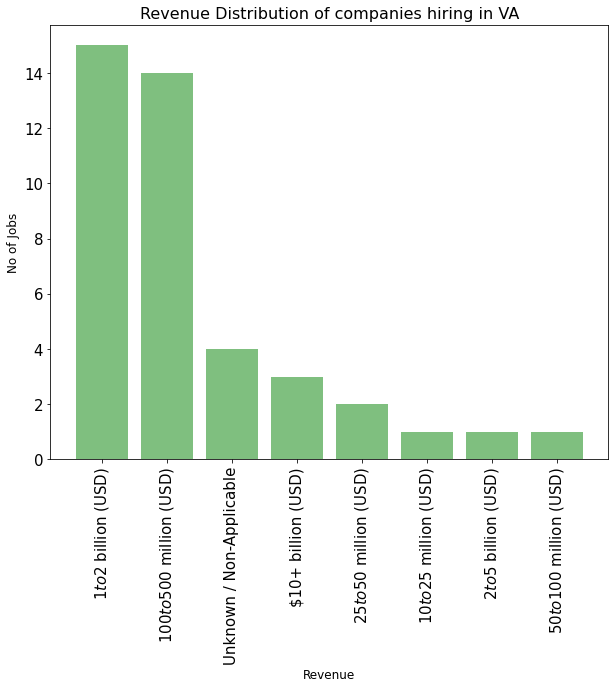

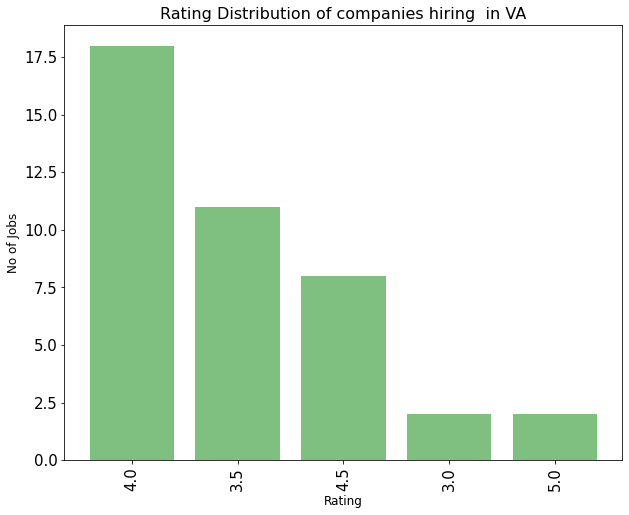

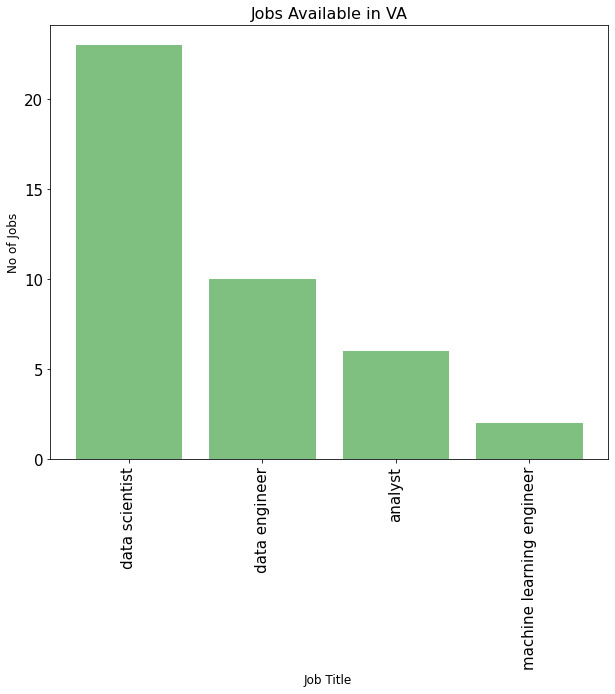

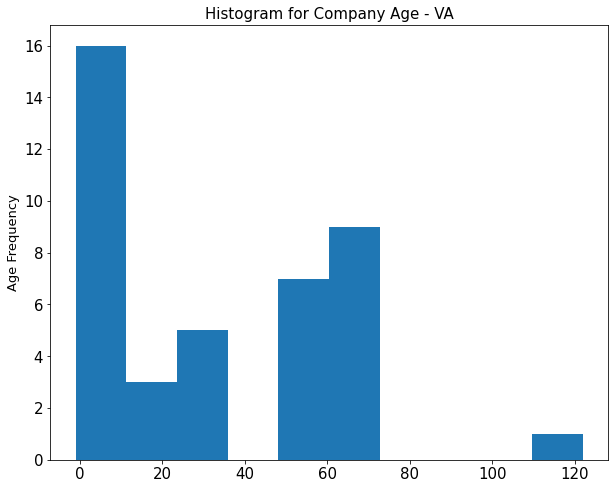

In [43]:
top_locations=states_job_top['Job Location'][0:4].tolist()
plot_chart_state(df,top_locations[0])    
plot_chart_state(df,top_locations[1])
plot_chart_state(df,top_locations[2])
plot_chart_state(df,top_locations[3])

In [44]:
new_df=df[['job_title_sim', 'Job Location', 'Grouped_Rating', 'Avg Salary(K)', 'Sector', 'Type of ownership', 'Revenue', 'Python', 'excel', 'sql', 'aws']]

new_df.rename(columns={'Avg Salary(K)': 'Avg_Salary'}, inplace=True)

C:\Users\cdste\AppData\Local\Temp\ipykernel_34776\808104314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns={'Avg Salary(K)': 'Avg_Salary'}, inplace=True)


In [45]:
new_df

new_df.to_csv('Resources/data/data_trimmed.csv')

In [46]:
top_locations=states_job_top['Job Location'][0:5].tolist()
conditions=[new_df['Job Location'] == top_locations[0],
            new_df['Job Location'] == top_locations[1],
            new_df['Job Location'] == top_locations[2],
            new_df['Job Location'] == top_locations[3],
            new_df['Job Location'] == top_locations[4]]

choices=[top_locations[0],top_locations[1],top_locations[2],top_locations[3],top_locations[4]]

new_df.loc[:,'group_loc']=np.select(conditions,choices,default='Rest')

df['job_title_sim'].unique()

conditions=[new_df['job_title_sim'] == "data scientist",
            new_df['job_title_sim'] == "machine learning engineer",
            new_df['job_title_sim'] == "data engineer"]

choices=["data scientist","machine learning engineer","data engineer"]

new_df.loc[:,'group_title']=np.select(conditions,choices,default='Rest')

top_sector=sector_job_top['Sector'][0:5].tolist()
conditions=[new_df['Sector'] == top_sector[0],
            new_df['Sector'] == top_sector[1],
            new_df['Sector'] == top_sector[2],
            new_df['Sector'] == top_sector[3],
            new_df['Sector'] == top_sector[4]]

choices=[top_sector[0],top_sector[1],top_sector[2],top_sector[3],top_sector[4]]

new_df.loc[:,'group_sector']=np.select(conditions,choices,default='Rest')

C:\Users\cdste\AppData\Local\Temp\ipykernel_34776\561085913.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:,'group_loc']=np.select(conditions,choices,default='Rest')
C:\Users\cdste\AppData\Local\Temp\ipykernel_34776\561085913.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:,'group_title']=np.select(conditions,choices,default='Rest')
C:\Users\cdste\AppData\Local\Temp\ipykernel_34776\561085913.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [47]:
final_new_df=new_df[['Grouped_Rating', 'Avg_Salary', 'Type of ownership', 'Revenue', 'Python', 'excel', 'sql', 'group_loc', 'group_title', 'group_sector', 'aws']]
final_new_df=pd.get_dummies(final_new_df, columns=['Grouped_Rating','Type of ownership','Revenue','group_loc','group_title', 'group_sector'])

In [48]:
final_new_df.head()

,Avg_Salary,Python,excel,sql,aws,Grouped_Rating_2.0,Grouped_Rating_2.5,Grouped_Rating_3.0,Grouped_Rating_3.5,Grouped_Rating_4.0,...,group_title_Rest,group_title_data engineer,group_title_data scientist,group_title_machine learning engineer,group_sector_Biotech & Pharmaceuticals,group_sector_Business Services,group_sector_Health Care,group_sector_Information Technology,group_sector_Insurance,group_sector_Rest
0,72.0,1,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,87.5,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,85.0,1,1,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,76.5,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,114.5,1,1,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


### **Model Building**

In [49]:
# identify relevant columns

df.columns
df_model = final_new_df
df_model

,Avg_Salary,Python,excel,sql,aws,Grouped_Rating_2.0,Grouped_Rating_2.5,Grouped_Rating_3.0,Grouped_Rating_3.5,Grouped_Rating_4.0,...,group_title_Rest,group_title_data engineer,group_title_data scientist,group_title_machine learning engineer,group_sector_Biotech & Pharmaceuticals,group_sector_Business Services,group_sector_Health Care,group_sector_Information Technology,group_sector_Insurance,group_sector_Rest
0,72.0,1,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,87.5,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,85.0,1,1,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,76.5,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,114.5,1,1,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,84.5,0,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
738,102.5,1,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
739,73.5,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
740,127.5,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [50]:
# get dummy varaibles
#df_dum = pd.get_dummies(df_model)

In [51]:
# train, test, split
X = df_model.drop('Avg_Salary', axis=1)
y = df_model.Avg_Salary.values
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.33, random_state=42)

### **Model 1 - Multiple Linear Regression**

In [52]:
# Multiple linear Regression
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

cross_val_score(lm, X_train, y_train, scoring= 'neg_mean_absolute_error', cv=3)


array([-2.39171687e+01, -7.77187704e+12, -2.27621212e+01])

In [53]:
np.mean(cross_val_score(lm, X_train, y_train, scoring= 'neg_mean_absolute_error', cv=3))

-2590625678839.4033

### **Model 2 - Lasso Regression**

In [54]:
# lasso Regression
lm_l = Lasso(alpha=0.01)
lm_l.fit(X_train, y_train)
np.mean(cross_val_score(lm_l, X_train, y_train, scoring= 'neg_mean_absolute_error', cv=3))


-23.609325892363206

In [55]:
alpha = []
error = []

for i in range (1,100):
    alpha.append(1/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lm_l, X_train, y_train, scoring= 'neg_mean_absolute_error', cv=3)))

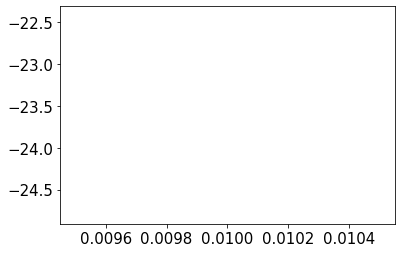

In [56]:
plt.plot(alpha,error)

In [57]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha', 'error'])

df_err[df_err.error == max(df_err.error)]
df_err

,alpha,error
0,0.01,-23.609326
1,0.01,-23.609326
2,0.01,-23.609326
3,0.01,-23.609326
4,0.01,-23.609326
...,...,...
94,0.01,-23.609326
95,0.01,-23.609326
96,0.01,-23.609326
97,0.01,-23.609326


### **Model 3 - Random Forest Regressor**

In [58]:
# random forest modifier
rf = RandomForestRegressor()

np.mean(cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=3))


-18.556904869572808

### **Model Optimization**

In [59]:
# optimize models using GridsearchCV

from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error', cv=3)
gs.fit(X_train, y_train)

C:\Users\cdste\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\cdste\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\cdste\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\cdste\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\cdste\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [60]:
gs.best_score_
gs.best_estimator_

RandomForestRegressor(criterion='mse', max_features='sqrt')

In [61]:
# test ensembles

tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)


In [62]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)

10034846928556.266

In [63]:
mean_absolute_error(y_test,tpred_lml)

22.70997478901465

In [64]:
mean_absolute_error(y_test,tpred_rf)

14.302821158480043

KeyError: 1

In [68]:
list(X_test.iloc[1,:])

[0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]